In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Read the data from the CSV file
data = pd.read_csv('projects/blog/1-linear-regression/data/housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


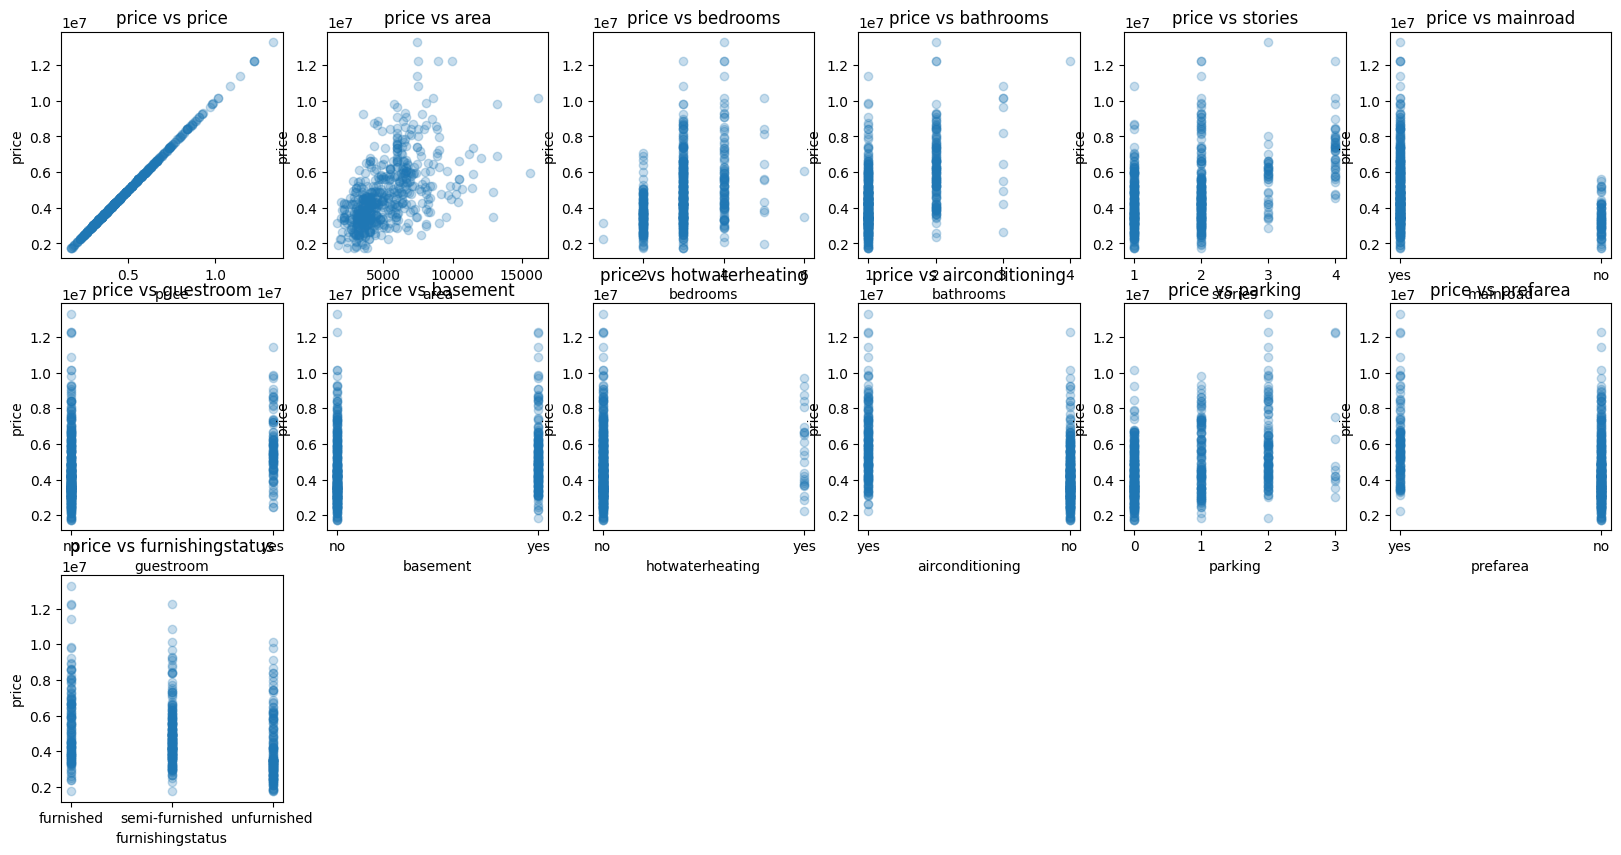

In [24]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(data.columns):
    plt.subplot(3, len(data.columns)//2, i+1)
    plt.plot(data[col], data['price'], 'o', alpha=0.25)
    plt.title('price vs ' + col)
    plt.xlabel(col)
    plt.ylabel('price')


In [30]:
# Shuffle dataset based off index
data = data.sample(frac=1).reset_index(drop=True)


In [31]:
train_val = 0.8
train_size = int(len(data) * train_val)
train_data = data[:train_size]
val_data = data[train_size:]


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim


In [69]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)


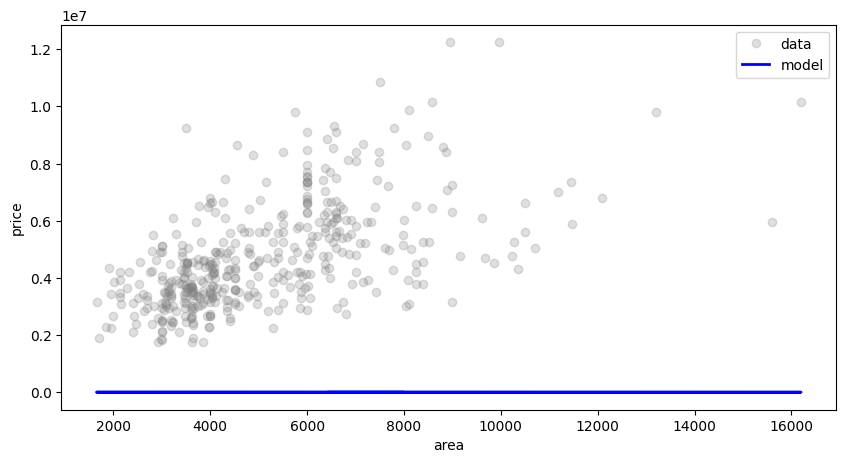

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(train_data['area'], train_data['price'], 'o', alpha=0.25, color='gray')

x = torch.tensor(train_data['area'].values, dtype=torch.float32).view(-1, 1)
y = model(x)

plt.plot(x, y.data, color='b', linewidth=2)

plt.xlabel('area')
plt.ylabel('price')
plt.legend(['data', 'model'])
plt.show()


In [74]:
print(model.state_dict())


OrderedDict([('weight', tensor([[-0.1239]])), ('bias', tensor([0.1308]))])


In [73]:
# Training loop
for epoch in range(100):
    for xi in x:
        optimizer.zero_grad()
        yi = model(xi)
        loss = criterion(yi, yi)
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Loss {loss.item()}")
        
        break
    break


Epoch 0, Loss 0.0
